In [170]:

# !pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-05lpeeup/twint_99fbac0bb6064cd687fe5d0328094cf6
  Running command git clone -q https://github.com/twintproject/twint.git /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-05lpeeup/twint_99fbac0bb6064cd687fe5d0328094cf6
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master


In [254]:
import pandas as pd
import twint
import re
import requests
import nest_asyncio
from textblob import TextBlob
nest_asyncio.apply()
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
candidate_name={'Peter Obi':'Obidients',
    'Bola Ahmed Tinubu':'BAT',
    'Atiku Abubakar':'Atiku'}

In [256]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-12-31'
    twint.run.Search(c)

In [257]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidate in search_vals.items():
        print ("running for search item: "+candidate[0]+"\n")
        print ("Search string: "+candidate[1]+"\n")
        
        #run twint
        twintConfig(candidate)
        
        #get dataframe
        df_all = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'Bank' column
        df_all["Candidate"]= candidate[0]
        out_df = pd.concat([out_df,df_all])
        
    return out_df

In [273]:
df_all = Run_Twint(candidate_name)

running for search item: Peter Obi

Search string: Obidients

1604055315506495488 2022-12-17 11:06:03 +0100 <Ogbeni_Sleem> @SodiqTade Lower your voice comrade ,off your mic Make obidients no hear  https://t.co/BKY24l8P5u
1604055132383358976 2022-12-17 11:05:20 +0100 <bestbehavi_or> @_ifeanyichukwuu 🤣🤣🤣🤣Bulabaa shuu just give up already
1604055053140099073 2022-12-17 11:05:01 +0100 <obidientsgot> @mee_tunde @obidientsgot
1604054467753541632 2022-12-17 11:02:41 +0100 <bestbehavi_or> @DoctorRESIDUAL Glory to the Lord that he's been found. I can't even bear to hear all these evil stories again on the media 😭😭 These days be scarier than anything.
1604054440067186688 2022-12-17 11:02:35 +0100 <ChinedumOc> @Humphrey_Mirac @jon_d_doe Are you Obidients?
1604054210215137282 2022-12-17 11:01:40 +0100 <Abdvlhaphiez> @0kike_ You didn't see the question mark? We've been there with sanctimonious Buharists. Obidients now call us enemies of Nigeria because we differ on what path to move Nigeria forward

1604043528581136384 2022-12-17 10:19:13 +0100 <obidientsgot> @NgLabourSupport @AishaYesufu More years mrs Aishayesufu as you added another year May the Angel 😇 celebrate with you.
1604043111742771200 2022-12-17 10:17:34 +0100 <CEO_KRG> #Obidatti2023 #Obidientmovement #Obidients #OBIdientlyYUSful #arewa4peterobi #Nigerians #NigeriaDecides2023
1604042911439622146 2022-12-17 10:16:46 +0100 <obidientsgot> @ajeromorgan @ruffydfire Amen
1604042424094904321 2022-12-17 10:14:50 +0100 <ryanonuoha> Doing absolutely wonderful! #Obidatti2023 #Obidients
1604041926029746176 2022-12-17 10:12:51 +0100 <Cicerorian_> @UchePOkoye Lol. I mean you "obidients" cannot seem to stick to reality
1604041911760818176 2022-12-17 10:12:48 +0100 <abiodun_swish> @ErnestIke8 @chiefakara @adeyanjudeji @SaharaReporters @ruffydfire @YeleSowore A person is only inspired by someone with superior knowledge. If those who are supporting PO are doing so because he inspires them, then those who said #Obidients are foolish didn'

1604036031963095040 2022-12-17 09:49:26 +0100 <ObidientsCO2023> COUNTDOWN!!!!!!  70 Days to Nigeria's MAKE or MAR!  Do you have your PVC? Would you be out at the polling unit protecting your votes?  #Obidatti2023 #NigeriaDecides2023
1604035635194597378 2022-12-17 09:47:51 +0100 <CEO_KRG> @CesarLord6 @GoziconC @PeterObi This is Very Very Deeeep.   #Obidatti2023 #Obidients #Obidientmovement #OBIdientlyYUSful #Nigerians #NigeriaDecides2023
1604035414607728640 2022-12-17 09:46:59 +0100 <omojesunimi19> @itzz_blitz1 You Obidients are running away from the truth. The Igbo are the main beneficiaries of the bridge. But because it was built by APC government, you will not acknowledge the achievement. Nevertheless, it's a plus for APC and Jagaban,a minus for Peter Obi and Atikulated. Jagaban wins
1604035350527098881 2022-12-17 09:46:43 +0100 <Okaylawrence1> @DrOkaforEmmanu1 Atiku Abubakar is working for APC, he worked for them in 2015 against Jonathan and stood and swore that APC'is his final bus

1604027406586564609 2022-12-17 09:15:09 +0100 <Hildash8> @naijaclasscapt @EtuboLion Obi is Coming #Obidatti2023 #Obidatti23 #Obidients
1604027080844496896 2022-12-17 09:13:52 +0100 <5stars_Crea8ive> @tommy_viccetti Wiz Fc Obidients✅💯
1604027077962899458 2022-12-17 09:13:51 +0100 <ogechicalista1> @Eman_gad3 @OlusegunSteph18 @joysucex_ My fellow #Obidients  pls fund me
1604027034581319680 2022-12-17 09:13:41 +0100 <Elija4411> @Chi_Nma1 My sister God is about to used-PO ANTEM to mark a new beginning of the NEW NIGERIA you're looking 4,but be careful and do a video call with REMA itself and I believe some OBIDIENTS will definitely fellow up for you kudos "YOUR GREATNESS IS ON THE WAY "......?
1604026971880673283 2022-12-17 09:13:26 +0100 <ToyinSsexy> @blessed4ever_10 Good morning sir #Obidients
1604026848442290176 2022-12-17 09:12:56 +0100 <teaboris123> @blessed4ever_10 @blessed_ajoke Good morning #Obidients
1604026550420209664 2022-12-17 09:11:45 +0100 <OmoteOse> @blessed4ever_10 Good mor

1604015270988857346 2022-12-17 08:26:56 +0100 <victor2exl> @Aminaruk OBIdients now I know our might....I hail una oooooooo....I hail myself join
1604015185215225856 2022-12-17 08:26:35 +0100 <chimaobi_nteoma> This is me after @PeterObi is declared Winner.   Do enjoy your weekend Obidients family  https://t.co/OKNUsJqEdc
1604015099932442624 2022-12-17 08:26:15 +0100 <IkediChima> @AishaYesufu Don't mind them, how can you promise to give what you don't have Is ATIEFKU a president? Has he won the election? Buhari who promised all the past governors in IGBOLAND president,he even lure @DaveUmahi to APC,Did he give him their party ticket? This is just distraction @PeterObi
1604015025974304770 2022-12-17 08:25:58 +0100 <AaJessehalliday> Everyday, I re-create and upload amazing, Exciting and insightful Videos, If you like this Video, it takes only 4 Secs to go to my Profile and hit the follow button, Do it now Obidients.
1604014909645361152 2022-12-17 08:25:30 +0100 <iam_wilsons> @chigozok @Doc

1604003380132716544 2022-12-17 07:39:41 +0100 <DanielAdindu> @nwaegbe_nkem Not only Adamu, a whole lot of others. I've muted a lot of them even some overzealous obidients.
1604003368917147650 2022-12-17 07:39:38 +0100 <WinnerCartal> Good morning my fellow obidients, pls go and get your PVC so you can vote the right person cause me I no ready to suffer pass like this ohhh ✌️
1604002715126099969 2022-12-17 07:37:02 +0100 <obidatihope4Nig> @VictorIsrael_ @luksidee @obidatihope4Nig
1604001902420688896 2022-12-17 07:33:49 +0100 <austin_izu> @UkUsedBoy @odogwu_obi Many Soludos(they bought overs) make noise in Anambra, but we the real Anambrarians know without doubt Obi is the man. Go to the streets and our villages you will marvel. God bless Peter Obi, God bless Obidients.
1604001840177336320 2022-12-17 07:33:34 +0100 <Ikenga101> @renoomokri Continue to cry while Peter Obi and his Obidients are smiling ☺ to victory ✌️. You should stop crying as Peter Obi is the next president of Nigeria. It 

1603991476945522688 2022-12-17 06:52:23 +0100 <ObaEdo_1> @elnyason The only thing wrong about this tweets is calling some obidients naive. It's very wrong, I believe we're different and I'd you don't see the need to defend obi whenever Reno makes a post that's fine by me, but don't call anyone naive for defending who he/she believes in.
1603991463729168387 2022-12-17 06:52:20 +0100 <Saidu_im> Peter Obi is a Nigerian project!!  Simon Ekpa is on the run, Obidients turned up the heat home and abroad and the fraud can no longer sit to make videos.   He even forgot to wear his IPOB insignia, a clear deviation and a sign that. ina wancan tsinannen @adamugarba  https://t.co/WvBVGdhiiN
1603991423082266624 2022-12-17 06:52:10 +0100 <D_goodybag> Good Morning my Beloved Obidients.  I want to remind you that INEC offices are also opened on weekends.  From 9am to 3pm.  Peter Obi win can only win with your votes and one vote is important. Please go and pick up your PVC! Tell a friend to tell a frien

1603973712109346816 2022-12-17 05:41:48 +0100 <omojesunimi19> @whitesprings22 @MissPearls Obidients hate the truth. You cannot tolerate superior argument that's why you resort to cyberbullying, cursing and abuse. Whether you like it or not, NO VICTORY PATH FOR PETER OBI. JAGABAN all the way!!!
1603972096991940608 2022-12-17 05:35:22 +0100 <VICTORC99830433> @renoomokri Atiku Minus One (AMO)  Obidients warmly invite you to physically participate in the upcoming 2023 general election.  You are welcome home.
1603971075448385536 2022-12-17 05:31:19 +0100 <MoyinoluwaVict4> Datti who's assuring Nigerians free education's owns one of the most expensive private @BazeUniversity ....but obidients are cool with it
1603967585065881601 2022-12-17 05:17:27 +0100 <BlessingNicole1> Yea he did Tinubu.Lagos.Peter Obi.Obidients
1603966334072631297 2022-12-17 05:12:28 +0100 <SheniKabiru> To teach your heart how to cope with carrying burdens in this world without ever getting affected or weighed down, I rec

1603932649059487744 2022-12-17 02:58:37 +0100 <Okaylawrence1> @Its__Emerald Nationwide delivery??? Onshore PH?? Abuja???
1603932514615234562 2022-12-17 02:58:05 +0100 <AztecccZ> It’s only “obidients” that believe this lamba 😂😂😂. By the way, many of them know it’s lamba too! They are hoping others are stupid enough to believe it.
1603932122363969536 2022-12-17 02:56:32 +0100 <Okaylawrence1> @scientistelochi No one is worried abt 'A Vegetable returned from d Market where buyers refused to buy'. Ọtí lọlẹ! Let me help U, I know U Àgbàdoists ar dull: Hint: #Tinubu is d #Vegetable, We d #Sane #Youths ar d Market buyers who refused to buy a sun-beaten, dry, &amp; wasted Vegetable! #Rtweet
1603931973466165249 2022-12-17 02:55:56 +0100 <Okaylawrence1> @Its__Emerald K'ilẹ eleyii???
1603931972786565120 2022-12-17 02:55:56 +0100 <OchiJnr> @Sirkay3024 @MoghaluKingsley The problem with many young people today is that you read the headlines and rush to respond. You don’t read to understand/comprehend

1603901572957831170 2022-12-17 00:55:08 +0100 <EAdilue> I appreciate all obidients for all they  have done &amp; still doing,appreciating @PeterObi for making us have hope again in Nigeria , Dear obidients this fight for Nigeria soul, you all have done well please keep spreading the good word of Peter obi.#PeterObiForPresident2023
1603901271831990277 2022-12-17 00:53:56 +0100 <_Sirjay7> @U_Rochas Obidients are colllecting PVC you dy here dy talk rubbish 😂😂. It’s not by making noise online you will see something 😂😂
1603899192598224896 2022-12-17 00:45:41 +0100 <Dannynose10> @NGRLabourParty Hélio Obidients
1603897492436930563 2022-12-17 00:38:55 +0100 <okoyemercury> @OselokaHObaze Good works, hope y'all staying safe out there....these unwarranted attacks on LP / OBIdients nationwide is becoming worrisome day after day.  God bless everyone in and outside PO's PCC list, Amen
1603897037723934722 2022-12-17 00:37:07 +0100 <AYOOijiwole>  https://t.co/lsVZXtUI5v
1603896835021627393 2022-12-17 

1603874305292525602 2022-12-16 23:06:47 +0100 <okuko4> @ruffydfire When Nigeria calls,you can never be silent if your a patriotic Nigerian..#VotePeterObiForPresident2023 #VoteWisely #EndSARS #TakeBackNaija  #Obidatti #Obidients  https://t.co/8Z3k2sMz6j
1603874142654042112 2022-12-16 23:06:08 +0100 <Ohmz___> @odogwu_obi @dozieezedol By population, they may have more obidients because Lagos is more populated than Edo.   The difference may be that on election day, Edo obidients can resist and push back armed thugs that may come to disrupt Peter Obi’s stronghold. Can our Lagos obidients resist Tinubu’s thugs?
1603873947258347552 2022-12-16 23:05:22 +0100 <dozieezedol> Get baba to SIGN that PEACE ACCORD NOW!!! #VotePeterObiForPresident2023 #Obidatti2023 #Obidients
1603873846129483794 2022-12-16 23:04:58 +0100 <AkobeOlorunfemi> OBIdients in Anambra should kindly leave The Obi of Onitsha, HRM Igwe Achebe Alone and continue licking their wounds. #RecoverAnambraWithAtiku was a huge success and 

1603861963721048064 2022-12-16 22:17:45 +0100 <Toshonaira> @Prettybae31 @solakafinta If he tels dem dat obidients ar d 1 gving him moni, pple wil consider it as voting  https://t.co/znvXDFi3gK if I may ask, av u eva given him moni?if not, shut ur dirty mouth cus dose wu do dat av never complained cos of d result.the result mata Dan to mention wu gves moni.
1603861624334467072 2022-12-16 22:16:24 +0100 <Donwisizu> @blessed4ever_10 @VictorIsrael_ @blessed_ajoke Chai, the alert done drop... Thanks for all you do for the OBIdients, boss. May ur pocket never run dry IJN... Amen.
1603861617862664208 2022-12-16 22:16:22 +0100 <Classic84073745> @PeterObi This will make it 2 strong members of obidients and labour party killed in the space of weeks. Tinubu should explain to Nigerians why he was unavailable for signing of peace accord with all other political parties.  https://t.co/FkvGnjUdWu
1603861471644958720 2022-12-16 22:15:47 +0100 <the_ssociety> @Odogwu_Nomso The love between Obidients and

1603849892169977858 2022-12-16 21:29:47 +0100 <RadJohnson1> They say OBIdients are toxic,  yet they murder us. We are taking notes.  Every fallen comrade will get justice when Peter Obi ascends the throne.
1603849757180301312 2022-12-16 21:29:14 +0100 <Agelessbeauty19> @daddyopm Nelson Mandela delivered his county South Africa from bad governance during his time. He was embraced by South Africans just like the Obidients have become a movement to vote in Peter Obi who is the deliverer that Nigeria needs at this time.
1603849414564581394 2022-12-16 21:27:53 +0100 <Peter98724677> @DeeOneAyekooto @osazenoo One million man match… you tried, but couldn'tt match #Obidients  Campaign rallies … even your principal can not address his supporters. Go&amp;Verify... you tried and drugs scandal and lies busted All known opinion pools..... @PeterObi is still leading in all.
1603849080354050060 2022-12-16 21:26:33 +0100 <molarors> Obidients are funny people,they want Soludo to support PO that left APG

1604055547560747010 2022-12-17 11:06:59 +0100 <rgnsupremacy> sabi ko magbbounce na ko bat nasa space ako ngayon??? HAHAHAA
1604055544100454400 2022-12-17 11:06:58 +0100 <qwaragi> SUMPAH EMANG NIH ORANG SOMBONG BAT ANJIRT 👎🏼 MANA JARANG BBT MGE CRIT ANJIRT PADAHAL CRIT RATE MYA UDAH 60 ANN, tpi blio adalah main gweh 😓
1604055544050118656 2022-12-17 11:06:58 +0100 <jungcacaaa_> ogah bat dah anjir, tebir
1604055539071488001 2022-12-17 11:06:57 +0100 <flawedoath> HAHAHAHAHAHAHAHAHAHA NUBAYAN ATE BAT MAY PA GANUN
1604055537146302465 2022-12-17 11:06:56 +0100 <linktieria> @TRAVOLTACUSTOM This makes up for him standing directly next to me and yet still somehow snubbing me at the matinee LOL (kidding I’d still love him anyway 🥰)
1604055532041551872 2022-12-17 11:06:55 +0100 <IntoTheBatVerse> @MgsOuterHaven Spiderman 2 the movie game where you go into Mysterios fun house with all the magic mirrors
1604055525611540480 2022-12-17 11:06:53 +0100 <MofBat> @lolibabalove2 ヤバい可愛い！ 欲しい！
160405551894718

1604055163152605185 2022-12-17 11:05:27 +0100 <zemetre> @MariePobemer Quand tu te bats pour te chauffer et bouffer tu n’as pas d’énergie à consacrer à la révolte. C’est pour cela que la destruction de la classe moyenne est systématique depuis des années. Pour éviter toute forme de révolte.
1604055160015454208 2022-12-17 11:05:26 +0100 <rcssmedasmith> Have #BBL batters forgotten how to bat???
1604055154600419330 2022-12-17 11:05:25 +0100 <morgan_pls> Messi ou pas... m’en bats les couilles Le seul trophée qu’il lui manque… rien a foutre…  #FRAARG  https://t.co/VfgwZ3JIJg
1604055152939307008 2022-12-17 11:05:25 +0100 <teptep_h> GUSTO KO MAG CHICKEN WINGS OR SAMGYUP HAJAJAHAHA BAT WALA AKO MAAYAAAA 🥹🥹🥹
1604055151249166337 2022-12-17 11:05:24 +0100 <IntoTheBatVerse> @Eric_cyril_ @kamkenobi This sounds like you've never touched a pussy in your life bro
1604055140587425793 2022-12-17 11:05:22 +0100 <gazzztros> ini apasi co jokes SZA muslim , gua receh bat anj 😭
1604055133931065346 2022-12-17 

1604054825255448578 2022-12-17 11:04:06 +0100 <sara_tsukisiro> 別に意識した訳じゃないけど、 多分BAT推しのロリィタさんが居たら割とおすすめな雰囲気の作品が出来るかも🤔(笑)
1604054815793086465 2022-12-17 11:04:04 +0100 <_anjwen> Bat walang driver? Gusto ko lang naman ng burger king 🥲
1604054814287355905 2022-12-17 11:04:04 +0100 <MofBat> @nanari_fox7 @TAKE_MofuLife なんか呼ばれた気が
1604054805449936897 2022-12-17 11:04:02 +0100 <VaddepallyPrav> @RVCJ_FB Correct. Cricket is played by bat and ball. What is role of English here?
1604054803260518400 2022-12-17 11:04:01 +0100 <sophiarchvs> bat ganon pag naglalapag ako biglang tumatahimik o kaya naman di em napapansin... did i do something
1604054802505551873 2022-12-17 11:04:01 +0100 <AhlRounder> @DONBora1992 Fail league.. dont know how to bat bro..
1604054799225348096 2022-12-17 11:04:00 +0100 <MagicBat1719> You don't need someone to complete you. You only need someone to accept you completely.
1604054798315114496 2022-12-17 11:04:00 +0100 <chawnudgrt> @wmjkshe boang sabi ko kung dimo gustong shinas

1604054453161689088 2022-12-17 11:02:38 +0100 <SillyBat147> The Brontosaurus never existed.
1604054440364883971 2022-12-17 11:02:35 +0100 <SannizL> Made a choker in a darkly inclined style. Will give that to my cool hair dresser. Cause she always makes time for my appointments. And today I will go there. Haven't done anything with my hair for a half year now... so it's time!  #diy #choker #bat #ring #gothjewelry #madebyme  https://t.co/nXNpj26KfQ
1604054437902811136 2022-12-17 11:02:34 +0100 <SillyBat147> A woodpecker's tongue wraps around its brain.
1604054437370400769 2022-12-17 11:02:34 +0100 <AlokRou50955078> @iShashiShekhar @yadavakhilesh Kya bat kahi, shasi bhai dil garden garden ho gaya..
1604054437361696769 2022-12-17 11:02:34 +0100 <kvn_grgz> GRABE, BAT RELATE AKO DITO?? 😭😭😭 @validemotionsmo   https://t.co/uQaSoeAW1j
1604054437286354944 2022-12-17 11:02:34 +0100 <mademesignup8> @JulianGuilarte1 People are over estimating what Bader can do offensively. He’s a below average hitt

1604054075607322624 2022-12-17 11:01:08 +0100 <the_bat> @mail_american 🤣
1604054071744380932 2022-12-17 11:01:07 +0100 <bat48611941>  https://t.co/y7tpTNXD1e
1604054069261500418 2022-12-17 11:01:06 +0100 <angeplusfour> @fearfulavoidant @JA_Jorm Lol I pay $500 a fkn week and my yard is unusable this didn’t even make me bat an eyelid 😂
1604054067768348672 2022-12-17 11:01:06 +0100 <aish_taroooo> @yeuki_ess Bat parang excited ka😱😱
1604054051334897666 2022-12-17 11:01:02 +0100 <bat711__> @hmad95907 بعيدا عند السالفه حقتك تصويرك واو👌🏻
1604054050223300609 2022-12-17 11:01:02 +0100 <ndaloi_bat365> وأهيم شوقا إن مررت بخاطري كهيام أرض للسحاب الماطـر
1604054033857220609 2022-12-17 11:00:58 +0100 <Lorabelzzz> @cinoleartmnl Iba ata yung araw sa Dubai bat ganun?! Lahat add to cart
1604054030061535233 2022-12-17 11:00:57 +0100 <linktieria> Taiyou’s pre-bright and dark encore was just “here is a quiz. Which one of my these things is longer?” And then he held up the ties of his jacket and literally ha

1604053794773295104 2022-12-17 11:00:01 +0100 <maisulari> Imagina ezazue musulmanek dirua eta indarrak bildu eta itunpeko eskola erlijioso bat sortuko balute.  Musulmanez beteko zen, noski. Segregatuak ala emantzipatuak?  Euskaldunok ikastolekin gauza bera lortu genuen.
1604053792819130368 2022-12-17 11:00:00 +0100 <mjjsanjuan> pero bat kasi sobrang sarap....
1604053780722769922 2022-12-17 10:59:57 +0100 <jhanicism> how wholesome! my religious household could never, if they ever found out i had sex (which I havent btw huhu) they would exorcise me PERO SHEMPRE BAT KO IPAPAALAM SA KANILA EH NINJA AKO?????!!! 🥷🥷🥷
1604053780265586689 2022-12-17 10:59:57 +0100 <BadBatLax> How I feel at 4 am working on coms
1604053777354739713 2022-12-17 10:59:57 +0100 <youreskrim> @apeungill Ini taun berapa ya Allah kangen, dulu sering bat lewat tl beginian😭
1604053777056612355 2022-12-17 10:59:56 +0100 <cayanankeb> Nakahawak ako ng not so bagong 1k bill. Bat sobrang nipis. Parang anytime, mapupunit hahahah

1604053445321056256 2022-12-17 10:58:37 +0100 <jamkyukyu> SERYOSO KASI SI JEONGWOO GUYS BAT KAYO GANYAN 😭😭😭
1604053435288268801 2022-12-17 10:58:35 +0100 <xuuuhao_o> @jellyaes HAHAHAHAHAHAHAHAHAHAHAHAHAHAHA taka ako bat nag iba ung music plsls 😭😭😭
1604053419580223490 2022-12-17 10:58:31 +0100 <zzz_bat12> @he_rofan え！！すご！！
1604053411171012610 2022-12-17 10:58:29 +0100 <BadBatLax> Working hard or hardly working  https://t.co/x3o9CFM49J
1604053410927431680 2022-12-17 10:58:29 +0100 <gyunilgyaon> 😭😭 bat kayo nagpapaiyak haaa
1604053393970192385 2022-12-17 10:58:25 +0100 <chawnudgrt> @wmjkshe bat moko ni e-md
1604053390857670656 2022-12-17 10:58:24 +0100 <abarcar_lisa> Bat kc ang ganda mo pinuno,napatitig tuloy c ken😁😁 #SB19_PABLO  #sb19 #SB19WYATHomeComing  Goodluck sa concert magalima😊  https://t.co/wyiuDJFKRc
1604053385140875265 2022-12-17 10:58:23 +0100 <leegyuyu> Kiter nak post csd laa
1604053382360051712 2022-12-17 10:58:22 +0100 <kylasumagui> Tanginaaa di ko gawain Yun, bat ganto Ako

1604053179238604801 2022-12-17 10:57:34 +0100 <SpaaceBat> Who voted no, im going to hunt each one of you guys
1604053166810894336 2022-12-17 10:57:31 +0100 <mooninwater333> Cùng đến phòng live của |👑| Cô Bi để trò chuyện và nhận thưởng！hãy điền mã giới thiệu của tôi 4359498077, sẽ có bất  https://t.co/dA7CfxW1KK  https://t.co/dTiZKdQTWp
1604053162310402049 2022-12-17 10:57:30 +0100 <linktieria> Changed my mind THIS is the best live part I’ve ever seen
1604053156928913414 2022-12-17 10:57:29 +0100 <BatTabtab> Lerchik and Suhar are best friends lol  https://t.co/ocHNebWEwn
1604053121214423040 2022-12-17 10:57:20 +0100 <KnowingBat1035> Forgiveness is not an occasional act, it is a constant attitude.
1604053118144348160 2022-12-17 10:57:19 +0100 <koish08> Gago bat brown kinalabasan pota BWHAHAHAHHAHA
1604053112951644162 2022-12-17 10:57:18 +0100 <qamar_yusufzai> Supreem cort balatkariyon ko azad karne ke pakch me suru se tha koi ye nai bat nahi
1604053106517372928 2022-12-17 10:57:17 +0100

1604052746562568193 2022-12-17 10:55:51 +0100 <_JEN0423> naiiyak ako 😭 ngayon lang ba to? 😭😭😭 bat kase lagi yumayakap jeno kay mark pag magpapa picture 😭😭😭 mga frens layag yung lubog na lubog na ship ko o  https://t.co/EFZkdIMoTh
1604052732696236032 2022-12-17 10:55:47 +0100 <KFK_2060> @Khoanguyen1012 @RyanNguyenHC mày ngu như bò , bất kể dự án shitcoin hay coin top cũng vây 1 thực thể nắm quá nhiều trong tay thì mày nghĩ chuyện gì xảy ra hả con chó ăn cứt ?? Tính phi tập trung của mạng sẽ đéo còn nữa hiểu chưa thằng ngu.
1604052720113291264 2022-12-17 10:55:44 +0100 <m__BatB__> 来年エルサの仮装やるorやる予定って方いらっしゃいます？💭
1604052712005701633 2022-12-17 10:55:43 +0100 <dionnpo> @joansilog_ bat di sila maglagay ng traffic enforcers sa ere dba
1604052710223155200 2022-12-17 10:55:42 +0100 <smn_lna> puro react ka sa story ko par haha bat di mo ko ichat
1604052705760231424 2022-12-17 10:55:41 +0100 <SpeedyBat777> As he waited for the shower to warm, he noticed that he could hear water change temperature.

1604055002368315393 2022-12-17 11:04:49 +0100 <Dozie2103> I have always looked at an @atiku candidacy from two prisms.   One favors the South East immensely   The other favors others in the long run.   I don't intend to discuss this beyond this
1604054995204296704 2022-12-17 11:04:47 +0100 <VirginSearcher> @swizzzlife @Froddoski1 @Goska002 @_dinomelaye How do u mean singling out SE from SW? OBJ and PYO already done 16yrs as president and VP.. North has done theirs with late Musa Yar'Adua of blessed memory and Buhari.. Atiku wasn't supposed to run as it was turn of the south but he was first to buy PDP ticket! Greed!!😡😡
1604054994159693825 2022-12-17 11:04:47 +0100 <ambrose91248792> @adamutanimuo12 @tsylars @UchePOkoye They came out for the governor,not ATIKU  I was there,we no even send ATIKU
1604054983183372289 2022-12-17 11:04:44 +0100 <Embharm> @adey_mi @atiku Alhamdunllah, I have nothing to loss if Atiku win, which by the way he won't just like previous attempts.  I seek no governm

1604053747650494465 2022-12-17 10:59:49 +0100 <hchahkandi> @_Khadejah_atiku نعم
1604053734967103488 2022-12-17 10:59:46 +0100 <dartNUPEboi> @fkeyamo @officialABAT A few years ago, Atiku said he jogs more than a mile everyday. This was when he criticized Buhari for his 800m trek in Daura. With what I am seeing here, I doubt if the Turaki n Adamawa still has the strength to cover such distance.
1604053734476189697 2022-12-17 10:59:46 +0100 <WiseKingOdafe> @FS_Yusuf_ Either Atiku or Tinubu’s presidency is dangerous for Nig. If Atiku wins, the South should forget presidency for a very long time as Hausa-Fulani will always manipulate and bribe the few southern politicians to retain power. If Tinubu win, Christians will be relegated politically.
1604053727404560384 2022-12-17 10:59:45 +0100 <jacoDwac> Two evil with different name @atiku &amp;@officialABAT are the same weak old generation while @OfficialPDPNig ‘ @OfficialAPCNg are the old bicycle they intend to lead to bush but we say no more

1604052871741407233 2022-12-17 10:56:21 +0100 <Okwesilieze82> Dead on arrival,  Atiku is losing
1604052871246499840 2022-12-17 10:56:21 +0100 <chikachayil> @BawBeeJay @SavvyRinu So Atiku can't win on his own, anyway for 30years he has never won and not now
1604052834890268672 2022-12-17 10:56:12 +0100 <haudu2002> @ShehuAA Except Atiku the Wazirin Adamawa.
1604052796944355328 2022-12-17 10:56:03 +0100 <Toptus04> @Teego1d @SymplysadeeQ @SavvyRinu If you actually go through historical records, you would have known Atiku was elected as Adamawa state governor less than 30yrs ago
1604052796529065986 2022-12-17 10:56:03 +0100 <VictorChukwueb8> @exquisiteOG @atiku @PeterObi As a stepping stone to Igbo presidency which he claims to be, the only reasonable thing for him to do at the moment is to step down from the race and support Peter Obi.
1604052754476974080 2022-12-17 10:55:53 +0100 <AkwashikiC> @fkeyamo @officialABAT Since your master and now Atiku are already short of becoming a President.

1604051826986319873 2022-12-17 10:52:12 +0100 <Oladiranreuben> @mamateeplus001 @ruffydfire @atiku @PeterObi And if he doesn't,  oma kan abuku ni. Ibaje loma ba nibe. Ko ni nisinmi ti ko ba pada leyin oro Tinubu.
1604051812180533253 2022-12-17 10:52:08 +0100 <medley_poetic> I've had this PVC since 2011, never voted - same for millions alike - what await PDAPC will be a shocker. @PeterObi LP has got one invested vote transferred to Lagos &amp; collected now. Atiku can wait till 2031 to as their step, even before primaries or vote. @FS_Yusuf @exquisiteOG  https://t.co/OMfM70bJmI
1604051805788569601 2022-12-17 10:52:06 +0100 <Thliza60> We Atiku supporters we always look calm and loyal 🥰✌🏼  https://t.co/bzNN5dVwbR
1604051787559931904 2022-12-17 10:52:02 +0100 <iamsavagelife> @RaymondNkannebe @atiku Ezii
1604051780396281856 2022-12-17 10:52:00 +0100 <ECharle79599190> @I_Am_Ilemona Atiku is not marketable that is why
1604051761945509888 2022-12-17 10:51:56 +0100 <babbanyarro> Nigeria is so mu

1604051165326344192 2022-12-17 10:49:34 +0100 <jhesudunsin> Who is Atiku going to offend today? Let’s find out what today’s narrative will be.  https://t.co/0oOiTDR8JG
1604051149367099393 2022-12-17 10:49:30 +0100 <DeltaMatters> @IAOkowa @OfficialPDPNig @atiku The PDP train hits Imo State today. Our candidates are doing well to #RecoverNigeria
1604051131377881089 2022-12-17 10:49:26 +0100 <mancherubic> @atiku Soludo can't force anyone to vote for you. If you like win, the awakened minds will vote for Peter Obi.
1604051111702581248 2022-12-17 10:49:21 +0100 <Uibeji> @DrOkaforEmmanu1 @atiku is useless &amp; incorrigible else why is he wasting his money on mercenary advisers who have zero electoral value to come &amp; make noise on SM, the buffoonery of these gentiles exposes how worthless Atiku is. If you're worth your onion you won't be perambulating w/o direction.
1604051066345361408 2022-12-17 10:49:10 +0100 <special_ward> @missolabisi1 I've seen videos of 2 preachers saying it's Atik

1604049800013438978 2022-12-17 10:44:08 +0100 <deantoff411> @jrnaib2 Atiku did more than this in 2019 but lost, now that his chance in the south is divided, we wonder where the love is from
1604049763757953026 2022-12-17 10:44:00 +0100 <Leyrey10> @thebardogbamola @TheoAbuAgada @dondekojo @atiku You people know elections will come and go and you are threatening whole country with revolution if your candidate doesn’t win which it’s obvious he won’t win
1604049707961049088 2022-12-17 10:43:46 +0100 <ochejerry> @realFFK @atiku See finish has step in.....
1604049696267313153 2022-12-17 10:43:44 +0100 <prettycachy> @thekaysie Some of these Igbos supporting and believing Atiku are just so gullible or perhaps they have been dollarized.
1604049690554732545 2022-12-17 10:43:42 +0100 <Favouracid> @IAOkowa @OfficialPDPNig @atiku You don turn Igbo man You want to come and tells how we should wait for 8 years before presidency will come to Igbo people Sha learn how to dodge stones
160404968240523264

1604048942466990081 2022-12-17 10:40:44 +0100 <Adamujadas> Alhaji @atiku Abubakar waziri Adamawa the incoming president of the federal republic of Nigeria insha Allah. Come 2023 #AtikuOrganizingForAction  #AtikuKawai2023 Babalele's Youths Awareness jada support atiku for president 2023 insha Allah. #BayasapUnifier  https://t.co/yMBaAQB0qq
1604048885336489987 2022-12-17 10:40:30 +0100 <theloneElf> @SavvyRinu Not correct. Atiku can't fight destiny. He is destined to lose so he can't collapse any structure.
1604048880869548032 2022-12-17 10:40:29 +0100 <IamPhilemon> Come to think of it Can you give what you don't have? How can Atiku, who has not gotten a presidency he has been chasing for over 20 years, promise Igbos presidency, with him being the stepping stone, and you fall for it.  Peter Obi is Igbos only clean shot to Presidency now !!!  https://t.co/kWZ0ITHatl
1604048834207703041 2022-12-17 10:40:18 +0100 <BishaarSuheeb> @_Khadejah_atiku waa kaa helay
1604048821788344321 2022-12-17 1

1604048023537045504 2022-12-17 10:37:05 +0100 <IbrahimSadiqGa1> @FelixNsanje @___Hameedah___ @_Khadejah_atiku What a pity
1604047981397053440 2022-12-17 10:36:55 +0100 <SarkiDankasuwa> @washafatee @_Khadejah_atiku Wow 🤝 gaskiya Aunt Ruky Tasha Mari harda fasa baki kaiii malan Aminu Saira
1604047975436767234 2022-12-17 10:36:53 +0100 <Emmy9589> @Emmanuelfuno @CCSoludo @atiku Are we even talking about Atiku 😂 I thought we were talking about Soludo 🤦 Atiku is an international Thief, everybody knows that
1604047963818434560 2022-12-17 10:36:51 +0100 <exquisiteOG> @ajasa_sunday @AquaenoEkanem @RaymondNkannebe @atiku @PeterObi has the largest acceptance across Nigeria today. He's asked us to vote for him because he will keep his promises and not because of where he's from or the faith he professes. Nigerians have confidence in him and we trust him. We really don't care where he's from
1604047852816285697 2022-12-17 10:36:24 +0100 <VirginSearcher> @swizzzlife @Froddoski1 @Goska002 @_dinomelay

1604046567656357889 2022-12-17 10:31:18 +0100 <segunwalesegun> @AishaYesufu Hmmmm..... Obi was in PDP. Tinubu na APC. Atiku don do both. By your analogy, all of dem na "dem dem" - same. Why then are you not campaigning for Kola Abiola or any of the others apart from these "dem dem"?.
1604046561432027138 2022-12-17 10:31:16 +0100 <gennysis_88481> @AustinNwabufo @2_amaechi @Constan02592105 @OwerriUpdate @BikerZenani @Atiku_Nig_2023 Are you kidding me 😂
1604046534970056705 2022-12-17 10:31:10 +0100 <Abugada> @Mr_onimS @Atiku_B Calm down na engineer, small thing now you wan take to another level 😊
1604046533984456704 2022-12-17 10:31:10 +0100 <ROAdeniran> @Emmy9589 @supab1902 @FS_Yusuf_ Atiku would definitely be ahead of Obi. He might fall short of winning though.
1604046522051866624 2022-12-17 10:31:07 +0100 <GrandMobilizer> @AishaYesufu Let no one promise you tomorrow, for no one is even sure of being alive tomorrow. Atiku is promising what he does not have. Typical Nigerian politician t

1604045481524576256 2022-12-17 10:26:59 +0100 <YinkaJones2> @IAOkowa @OfficialPDPNig @atiku The train of #Recovery just arrived at Imo. Imo citizens, are you ready for the transformation and change we are all clamoring for.  #RecoveryTeam #AtikuOkowa2023  #AtikuInImo
1604045475581423616 2022-12-17 10:26:57 +0100 <DesmondFelix181> @AishaYesufu Keep quiet madam cash out..You are really milking LP dry ..how have you contributed to Obi's success whether financially or other means... whether you like it or yes HE Atiku Abubakar (my boss) will become your president come may 29th 2023.
1604045446967689218 2022-12-17 10:26:50 +0100 <AkataEneriome> @IAOkowa @OfficialPDPNig @atiku Together we can get it done, let move together with Atiku-Okowa to recover Nigeria.  Recover team is working to claim it by the grace of God
1604045444891529216 2022-12-17 10:26:50 +0100 <okey_caleb> I love Peter Obi, but truth be told i admire Atiku a great deal. It takes a lot of courage and doggedness to still conte

In [274]:
pd.set_option('display.max_rows', 10000)

In [275]:
pd.set_option('display.max_columns', 10000)

In [276]:
pd.set_option('display.max_colwidth', None)

In [277]:
df_all.head(1)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1604055315506495488,1604054168854880256,1.671272e+12,2022-12-17 11:06:03,+0100,,"@SodiqTade Lower your voice comrade ,off your mic Make obidients no hear https://t.co/BKY24l8P5u",en,[],[],900855912386179072,900855912386179072,Ogbeni_Sleem,OGBENI 🇳🇬🇳🇬🇳🇬,6,11,https://twitter.com/Ogbeni_Sleem/status/1604055315506495488,[],[https://pbs.twimg.com/media/FkK_zw-XwAA53KH.jpg],1,https://pbs.twimg.com/media/FkK_zw-XwAA53KH.jpg,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'SodiqTade', 'name': 'Premier', 'id': '1032296549286666240'}]",,,,,Peter Obi


## Making a Copy of the Dataset

In [278]:
#making a copy
df = df_all.copy()

## Data Cleaning

In [279]:
#accessing the twint information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 510
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1547 non-null   object 
 1   conversation_id  1547 non-null   object 
 2   created_at       1547 non-null   float64
 3   date             1547 non-null   object 
 4   timezone         1547 non-null   object 
 5   place            1547 non-null   object 
 6   tweet            1547 non-null   object 
 7   language         1547 non-null   object 
 8   hashtags         1547 non-null   object 
 9   cashtags         1547 non-null   object 
 10  user_id          1547 non-null   int64  
 11  user_id_str      1547 non-null   object 
 12  username         1547 non-null   object 
 13  name             1547 non-null   object 
 14  day              1547 non-null   int64  
 15  hour             1547 non-null   object 
 16  link             1547 non-null   object 
 17  urls           

In [280]:
#the description of the twint 
df.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,1.547000e+03,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,1.671264e+12,9.089808e+17,5.920491,0.117001,5.463478,1.235941,1.429864
std,1.368193e+07,6.648533e+17,0.270619,0.321525,60.848319,21.447292,16.196424
min,1.671221e+12,1.600746e+07,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1.671265e+12,2.201018e+09,6.000000,0.000000,0.000000,0.000000,0.000000
50%,1.671271e+12,1.172325e+18,6.000000,0.000000,0.000000,0.000000,0.000000
75%,1.671271e+12,1.534657e+18,6.000000,0.000000,0.500000,0.000000,0.000000
max,1.671272e+12,1.604055e+18,6.000000,1.000000,1989.000000,736.000000,518.000000


In [281]:
df.shape

(1547, 39)

In [282]:
#droping rows which languange =! english
df["language"].unique()

array(['en', 'qam', 'pt', 'und', 'qht', 'de', 'qme', 'in', 'eu', 'da',
       'tl', 'pl', 'tr', 'is', 'fr', 'zxx', 'ht', 'es', 'ja', 'vi', 'hi',
       'ar', 'cs', 'art', 'it', 'iw', 'bg', 'qst', 'hu', 'et', 'ru', 'lv',
       'cy', 'lt'], dtype=object)

In [283]:
#language that contains only english
df = df[df["language"].isin(['en'])]

In [284]:
df.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1604055315506495488,1604054168854880256,1.671272e+12,2022-12-17 11:06:03,+0100,,"@SodiqTade Lower your voice comrade ,off your mic Make obidients no hear https://t.co/BKY24l8P5u",en,[],[],900855912386179072,900855912386179072,Ogbeni_Sleem,OGBENI 🇳🇬🇳🇬🇳🇬,6,11,https://twitter.com/Ogbeni_Sleem/status/1604055315506495488,[],[https://pbs.twimg.com/media/FkK_zw-XwAA53KH.jpg],1,https://pbs.twimg.com/media/FkK_zw-XwAA53KH.jpg,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'SodiqTade', 'name': 'Premier', 'id': '1032296549286666240'}]",,,,,Peter Obi
1,1604055132383358976,1604030925427326978,1.671272e+12,2022-12-17 11:05:20,+0100,,@_ifeanyichukwuu 🤣🤣🤣🤣Bulabaa shuu just give up already,en,[],[],1080110138919477251,1080110138919477251,bestbehavi_or,Trybe of The Obidients ✊,6,11,https://twitter.com/bestbehavi_or/status/1604055132383358976,[],[],0,,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': '_ifeanyichukwuu', 'name': 'Peter Obi last Born (Imolite)', 'id': '1210660276393132036'}]",,,,,Peter Obi


In [285]:
#the shape of the datset
df.shape

(1160, 39)

In [286]:
#dropping unnecessary columns
df = df.drop(['id', 'conversation_id', 'timezone', 'place', 'cashtags', 'language', 'name', 'search', 'hashtags','user_id', 'day', 'hour', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source',  'username', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis = 1)

In [287]:
#checking null values
df.isnull().sum()


date         0
tweet        0
nlikes       0
Candidate    0
dtype: int64

In [288]:
#the get the count of duplicated rows
df_1 = df.duplicated().value_counts()
df_1

False    1160
dtype: int64

In [289]:
#using regular expression to remove the signs, links, hastags, non_alphabet etc
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [290]:
pat1 = r'@[^ ]+'                   #@signs
pat2 = r'https?://[A-Za-z0-9./]+'  #links
pat3 = r'\'s'                      #floating s's
pat4 = r'\#\w+'                     # hashtags
pat5 = r'&amp '
pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))

In [291]:
combined_pat

"@[^ ]+|https?://[A-Za-z0-9./]+|\\'s|\\#\\w+|&amp |[^A-Za-z\\s]"

In [292]:
#applying the regular expression cleaning
df['tweet'] = df['tweet'].apply(clean_text)

In [293]:
#keeping it in a new dataframe
df_result = df.drop_duplicates()

In [294]:
df_result1 = df_result.copy()

In [295]:
#keeping it in a dataframe
df_result1.head(2)

,date,tweet,nlikes,Candidate
0,2022-12-17 11:06:03,lower your voice comrade off your mic make obidients no hear,0,Peter Obi
1,2022-12-17 11:05:20,bulabaa shuu just give up already,0,Peter Obi


In [296]:
print("Running sentiment process")
# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#applying the subjectivity and polarity function
df_result1["Subjectivity"] = df_result1['tweet'].apply(getSubjectivity)
df_result1["Polarity"] = df_result1['tweet'].apply(getPolarity)

Running sentiment process


In [297]:
#seeig a sample of the result
df_result1.sample()

,date,tweet,nlikes,Candidate,Subjectivity,Polarity
258,2022-12-17 10:47:26,ashawo no dey see better,0,Atiku Abubakar,0.5,0.5


In [298]:
#function to determine the positive, negative and neutral sentiments
def getAnalysis(text):
    if text < 0:
        return 'negative'
    elif text == 0:
        return 'neutral'
    else:
        return 'positive'
           

In [299]:
df_result1['Analysis'] = df_result1['Polarity'].apply(getAnalysis)

In [300]:
df_result1.head(4)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 11:06:03,lower your voice comrade off your mic make obidients no hear,0,Peter Obi,0.0,0.0,neutral
1,2022-12-17 11:05:20,bulabaa shuu just give up already,0,Peter Obi,0.0,0.0,neutral
3,2022-12-17 11:02:41,glory to the lord that he been found i cant even bear to hear all these evil stories again on the media these days be scarier than anything,0,Peter Obi,1.0,-1.0,negative
4,2022-12-17 11:02:35,are you obidients,0,Peter Obi,0.0,0.0,neutral


In [301]:
#locating all Peter_obi's sentiment
Peter_Obi = df_result1.loc[df_result1['Candidate'] == 'Peter Obi']
Peter_Obi.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 11:06:03,lower your voice comrade off your mic make obidients no hear,0,Peter Obi,0.0,0.0,neutral
1,2022-12-17 11:05:20,bulabaa shuu just give up already,0,Peter Obi,0.0,0.0,neutral
3,2022-12-17 11:02:41,glory to the lord that he been found i cant even bear to hear all these evil stories again on the media these days be scarier than anything,0,Peter Obi,1.0,-1.0,negative
4,2022-12-17 11:02:35,are you obidients,0,Peter Obi,0.0,0.0,neutral
5,2022-12-17 11:01:40,you didnt see the question mark weve been there with sanctimonious buharists obidients now call us enemies of nigeria because we differ on what path to move nigeria forward your ways are not the only ways,0,Peter Obi,1.0,0.0,neutral


In [302]:
#Peter Obi Analysis Count
AnalysisCount_PeterObi= Peter_Obi['Analysis'].groupby(Peter_Obi['Analysis']).size().reset_index(name='counts')
AnalysisCount_PeterObi

,Analysis,counts
0,negative,94
1,neutral,176
2,positive,225


In [303]:
#locating all BAT's sentiment
BAT = df_result1.loc[df_result1['Candidate'] == 'Bola Ahmed Tinubu']
BAT.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 11:07:19,mumu i am not even an obidient atiku and obi can work for the country certainly not that chimpanzee you call bat we are waiting for him in the north he will never be president never he is just an established thief,0,Bola Ahmed Tinubu,0.571429,-0.107143,negative
1,2022-12-17 11:07:19,mugu mumu is saying track record a drug dealer has a good track record what has this so bat did do you know what is called a track record,0,Bola Ahmed Tinubu,0.600000,0.700000,positive
2,2022-12-17 11:07:17,bat wala sakin sa trendlist sksksks decembelle withdonny,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
4,2022-12-17 11:07:17,the teens wondered what was kept in the red shed on the far edge of the school grounds,0,Bola Ahmed Tinubu,0.500000,0.050000,positive
6,2022-12-17 11:07:16,she found his complete dullness interesting,0,Bola Ahmed Tinubu,0.450000,0.300000,positive


In [304]:
#BAT Analysis Count
AnalysisCount_BAT= BAT['Analysis'].groupby(BAT['Analysis']).size().reset_index(name='counts')
AnalysisCount_BAT

,Analysis,counts
0,negative,38
1,neutral,85
2,positive,89


In [305]:
#locating all Atiku's sentiment
Atiku_Abubakar = df_result1.loc[df_result1['Candidate'] == 'Atiku Abubakar']
Atiku_Abubakar.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 11:07:53,tinubu amp atiku arent fit to be our president you need to vote for peter obi those narratives that tinubu built lagos are scams if he did that was in his good days he is old weak and cannot replicate that now beware of fraudsters that wants to take advantage of his weakness,0,Atiku Abubakar,0.385000,0.205000,positive
1,2022-12-17 11:07:53,igbo na the real hustle to be mr president for atiku apc while soludo is the only known term governor that will be chased out of office like a thief after years,0,Atiku Abubakar,0.650000,0.100000,positive
2,2022-12-17 11:07:43,who is this efulefu again abegkiaa wetin musa no go see for gate man workcarry your one vote go meet atikuat least he has promised your click presidency after his eight years same as buhari promisedmumu dey run for blood,0,Atiku Abubakar,0.262500,-0.150000,negative
3,2022-12-17 11:07:42,god help us,0,Atiku Abubakar,0.000000,0.000000,neutral
4,2022-12-17 11:07:22,yes new atiku is apc and apc destroyed nigeria atiku is tinubu and tinubu is atiku we have decided to do away with them we have made our camp with peter obi peter obigrace peter obigo forward peter obitake back nigeria,0,Atiku Abubakar,0.227273,0.068182,positive


In [306]:
#Atiku Analysis Count
AnalysisCount_AtikuAbubakar= Atiku_Abubakar['Analysis'].groupby(Atiku_Abubakar['Analysis']).size().reset_index(name='counts')
AnalysisCount_AtikuAbubakar

,Analysis,counts
0,negative,121
1,neutral,156
2,positive,176


In [307]:
#grouping all candidates
the_candidates = df_result1.loc[df_result1['Analysis'] == 'positive']
the_candidates.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
15,2022-12-17 10:56:40,the opinions of obidients doesnt get to me in people called us unpatriotic offsprings of corruption all because we backed gej ive never earned a naira backing gej and same as backing atiku im just a citizen loud with my political choices sanctimonious buharists,0,Peter Obi,0.341667,0.033333,positive
19,2022-12-17 10:52:37,happy birthday to the president of the frn mr muhammadu buhari with love from nigerians amp we wish you happy birthday as you turn a new chapter in your yrs of life may the lord bless you and your family amin dey play fcmb mr president edo state lagos ibadan,1,Peter Obi,0.763636,0.559091,positive
21,2022-12-17 10:49:52,when god is behind a project unbelievable things happen countless nigerians going to d most hidden amp roughest places to campaign for peter obi without any payment making so much sacrifice god is about overthrowing d criminals holding our nation captive obidients more,0,Peter Obi,0.541667,0.072917,positive
23,2022-12-17 10:48:21,this is the caliber of people we keep arguing with day by day i thought the obidients want a better nigeria,0,Peter Obi,0.500000,0.500000,positive
25,2022-12-17 10:45:05,this is true and thanks for sharing there are so many misconceptions of what branding truly is or what a brand is thanks for simplifying it,0,Peter Obi,0.387500,0.312500,positive


In [308]:
#positive sentiments counts for all candidates
all_candidates = the_candidates['Candidate'].groupby(the_candidates['Candidate']).size().reset_index(name='counts')
all_candidates

,Candidate,counts
0,Atiku Abubakar,176
1,Bola Ahmed Tinubu,89
2,Peter Obi,225


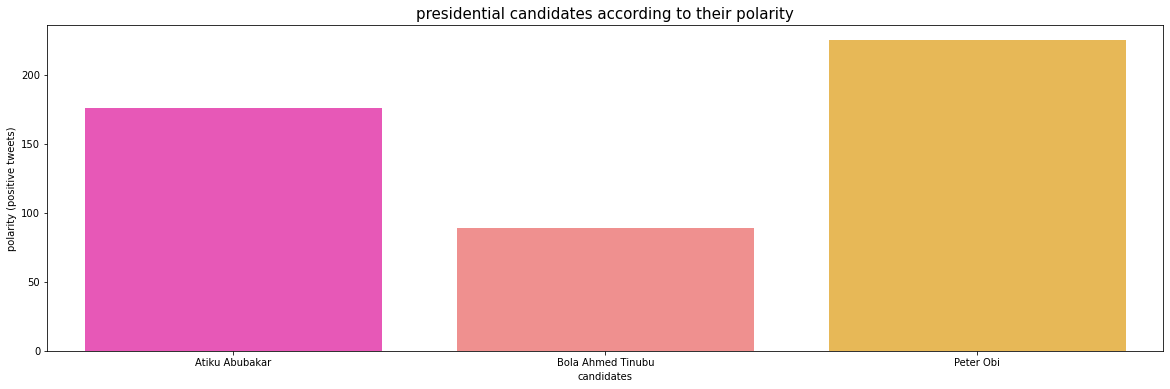

In [309]:
#plotting the results
plt.figure(figsize=(20,6))
sns.barplot(data = all_candidates, x= 'Candidate', y ='counts', palette = 'spring')

#setting the properties for the chart
plt.title('presidential candidates according to their polarity', fontsize = 15 ) 
plt.xlabel('candidates')
plt.ylabel('polarity (positive tweets)')

#saving the chart
plt.show()

In [310]:
#saving the dataframe to csv
df_result1.to_csv('sentiment.csv')